# CV Project 2
### Submitted by:
### Vivek Bharti
### vb1275@nyu.edu

## Exercise 1.1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, floor, ceil, radians

# Reading input image
imageArray_1 = cv2.imread('V.png')

# coverting image to gray scale
grayImage_1 = 0.2989*imageArray_1[:,:,0] + 0.5870*imageArray_1[:,:,1] + 0.1140*imageArray_1[:,:,2]

# plotting image
imgplot = plt.imshow(grayImage_1, cmap = 'gray')
plt.title("Original Image")
plt.show()

#Nearest neighbor
def NN(grayImage_1, transform,target_img):
    columns = grayImage_1.shape[1]   
    rows = grayImage_1.shape[0]
    transform = np.linalg.inv(transform)
    for i in range(rows):
        for j in range(columns):
            target_vector = np.array([i, j, 1]).reshape(3, 1)
            source_vector = np.matmul(transform, target_vector)
            if source_vector[0][0] > 0 and source_vector[0][0] < rows-1 and source_vector[1][0] > 0 and source_vector[1][0] < columns-1:
                x = int(np.round(source_vector[0][0]))
                y = int(np.round(source_vector[1][0]))
                target_img[i, j] = grayImage_1[x, y]
    return target_img
            
# function to scale the image for Nearest Neighbor
def scale(grayImage_1, sx, sy):
    target_img = np.zeros(grayImage_1.shape)
    transform = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    target_img = NN(grayImage_1, transform, target_img)
    return target_img

# function to rotate the image
def rotate(grayImage_1, theta):
    target_img = np.zeros(grayImage_1.shape)
    transform = np.array([[cos(theta), sin(theta), 0], [-(sin(theta)), cos(theta), 0], [0, 0, 1]])
    target_img = NN(grayImage_1, transform, target_img)
    return target_img

# function to translate the image
def translate(grayImage_1, tx, ty):
    target_img = np.zeros(grayImage_1.shape)
    transform = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    target_img = NN(grayImage_1, transform, target_img)
    return target_img

# function to shear the image
def shear(grayImage_1, shx, shy):
    target_img = np.zeros(grayImage_1.shape)
    transform = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    target_img = NN(grayImage_1, transform, target_img)
    return target_img

Scaled_img_NN = scale(grayImage_1, 2, 2)
Rotated_img_NN = rotate(grayImage_1, 3.14/6)
Translated_img_NN = translate(grayImage_1, 100, 100)
sheared_img_NN = shear(grayImage_1, .5, 0)

# plotting Scaled image using Nearest Neighbor
imgplot = plt.imshow(Scaled_img_NN, cmap = 'gray')
plt.title("Scaled Image Using Nearest Neighbor")
plt.show()

# plotting rotated image using Nearest Neighbor
imgplot = plt.imshow(Rotated_img_NN, cmap = 'gray')
plt.title("Rotated Image Using Nearest Neighbor")
plt.show()

# plotting Translated image using Nearest Neighbor
imgplot = plt.imshow(Translated_img_NN, cmap = 'gray')
plt.title("Translated Image Using Nearest Neighbor")
plt.show()

# plotting image using Nearest Neighbor
imgplot = plt.imshow(sheared_img_NN, cmap = 'gray')
plt.title("Sheared Image Using Nearest Neighbor")
plt.show()

#Bilinear Interpolation
def Biliniear(grayImage_1, transform,target_img):
    columns = grayImage_1.shape[1]   
    rows = grayImage_1.shape[0]
    transform = np.linalg.inv(transform)
    for i in range(rows):
        for j in range(columns):
            
            target_vector = np.array([i, j, 1]).reshape(3, 1)
            source_vector = np.matmul(transform, target_vector)
            
            if source_vector[0][0] > 0 and source_vector[0][0] < rows-1 and source_vector[1][0] > 0 and source_vector[1][0] < columns-1:
                x_floor = int(np.floor(source_vector[0][0]))
                x_ceil = int(np.ceil(source_vector[0][0]))
                y_floor = int(np.floor(source_vector[1][0]))
                y_ceil = int(np.ceil(source_vector[1][0]))
                
                x = source_vector[0][0]
                y = source_vector[1][0]
                Q = np.array([grayImage_1[x_floor, y_floor], grayImage_1[x_floor, y_ceil], grayImage_1[x_ceil, y_floor], grayImage_1[x_ceil, y_ceil]]).reshape(2, 2)
                
                if x_floor == x_ceil and y_floor == y_ceil:
                    target_img[i, j] = grayImage_1[x_floor][y_floor]
                
                elif x_floor == x_ceil:
                    target_img[i, j] = (((y-y_floor)/(y_ceil-y_floor))*Q[0,1]) + (((y_ceil-y)/(y_ceil-y_floor))*Q[0,0])

                elif y_floor == y_ceil:
                    target_img[i, j] = (((x-x_floor)/(x_ceil-x_floor))*Q[1,0]) + (((x_ceil-x)/(x_ceil-x_floor))*Q[0,0])

                else:
                    r1 = (((x-x_floor)/(x_ceil-x_floor))*Q[1,0]) + (((x_ceil-x)/(x_ceil-x_floor))*Q[0,0])
                    r2 = (((x-x_floor)/(x_ceil-x_floor))*Q[1,1]) + (((x_ceil-x)/(x_ceil-x_floor))*Q[0,1])
                    target_img[i, j] = (((y-y_floor)/(y_ceil-y_floor))*r2) + (((y_ceil-y)/(y_ceil-y_floor))*r1)        
                        
    return target_img

# function to scale the image using Bilinear Interpolation
def scale_bi(grayImage_1, sx, sy):
    target_img = np.zeros(grayImage_1.shape)
    transform = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    target_img = Biliniear(grayImage_1, transform, target_img)
    return target_img

# function to rotate the image using Bilinear Interpolation
def rotate_bi(grayImage_1, theta):
    target_img = np.zeros(grayImage_1.shape)
    transform = np.array([[cos(theta), sin(theta), 0], [-(sin(theta)), cos(theta), 0], [0, 0, 1]])
    target_img = Biliniear(grayImage_1, transform, target_img)
    return target_img

# function to rotate the image using Bilinear Interpolation
def translate_bi(grayImage_1, tx, ty):
    target_img = np.zeros(grayImage_1.shape)
    transform = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    target_img = Biliniear(grayImage_1, transform, target_img)
    return target_img

# function to shear the image using Bilinear Interpolation
def shear_bi(grayImage_1, shx, shy):
    target_img = np.zeros(grayImage_1.shape)
    transform = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    target_img = Biliniear(grayImage_1, transform, target_img)
    return target_img

Scaled_img_bi = scale_bi(grayImage_1, .5 , .5)
Rotated_img_bi = rotate_bi(grayImage_1, 3.14/6)
Translated_img_bi = translate_bi(grayImage_1, 100, 100)
sheared_img_bi = shear_bi(grayImage_1, .5, 0)

# plotting Scaled Using Bilinear Interpolation
imgplot = plt.imshow(Scaled_img_bi, cmap = 'gray')
plt.title("Scaled Image Using Bilinear Interpolation")
plt.show()

# plotting rotated image Using Bilinear Interpolation
imgplot = plt.imshow(Rotated_img_bi, cmap = 'gray')
plt.title("Rotated Image Using Bilinear Interpolation")
plt.show()

# plotting Translated image Using Bilinear Interpolation
imgplot = plt.imshow(Translated_img_bi, cmap = 'gray')
plt.title("Translated Image Using Bilinear Interpolation")
plt.show()

# plotting Sheared image Using Bilinear Interpolation
imgplot = plt.imshow(sheared_img_bi, cmap = 'gray')
plt.title("Sheared Image Using Bilinear Interpolation")
plt.show()

#Affine Transformation Using Bilinear Interpolation

def affine_bi(grayImage_1, sx, sy, theta, tx, ty, shx, shy):
    transform_scale = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    transform_rotate = np.array([[cos(theta), sin(theta), 0], [-(sin(theta)), cos(theta), 0], [0, 0, 1]])
    transform_translate = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    transform_shear = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    
    transform_affine = np.matmul(np.matmul(transform_translate, transform_scale), transform_rotate)
    target_img = np.zeros(grayImage_1.shape)
    
    target_img = Biliniear(grayImage_1, transform_affine, target_img)
    return target_img

def affine_NN(grayImage_1, sx, sy, theta, tx, ty, shx, shy):
    transform_scale = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    transform_rotate = np.array([[cos(theta), sin(theta), 0], [-(sin(theta)), cos(theta), 0], [0, 0, 1]])
    transform_translate = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
    transform_shear = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
    
    transform_affine = np.matmul(np.matmul(transform_translate, transform_scale), transform_rotate)
    target_img = np.zeros(grayImage_1.shape)
    target_img = NN(grayImage_1, transform_affine,target_img)
    
    return target_img

Affine_img_bi = affine_bi(grayImage_1, .5, .5, 3.14/6, 100, 100, .5, 0)

Affine_img_NN = affine_NN(grayImage_1, .5, .5, 3.14/6, 100, 100, .5, 0)

# plotting Affine image for Bilinear
imgplot = plt.imshow(Affine_img_bi, cmap = 'gray')
plt.title("Affine Image Using Bilinear Interpolation")
plt.show()

# plotting Affine image for Nearest Neighbor
imgplot = plt.imshow(Affine_img_NN, cmap = 'gray')
plt.title("Affine Image Using Nearest Neighbor")
plt.show()

# Zooming the images to compare
imgplot = plt.imshow(Affine_img_bi, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.xlim(100, 200)
plt.ylim(300, 200)
plt.title("Zoomed Affine Image Using Bilinear Interpolation")
plt.show()

# Zooming the images to compare
imgplot = plt.imshow(Affine_img_NN, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.xlim(100, 200)
plt.ylim(300, 200)
plt.title("Zoomed Affine Image Using Nearest Neighbor")
plt.show()



## 1.2

61 25
425 256
62 527
524 61
293 424
20 59
source =  [[ 61  25]
 [425 256]
 [ 62 527]]
taget =  [[524  61]
 [293 424]
 [ 20  59]]
X =  [[ 25  61   1   0   0   0]
 [  0   0   0  25  61   1]
 [256 425   1   0   0   0]
 [  0   0   0 256 425   1]
 [527  62   1   0   0   0]
 [  0   0   0 527  62   1]]
x_ =  [[ 61]
 [524]
 [424]
 [293]
 [ 59]
 [ 20]]
a [[ -5.97818046e-03]
 [  1.00104659e+00]
 [  8.56123662e-02]
 [ -1.00398911e+00]
 [  2.53154846e-03]
 [  5.48945303e+02]]


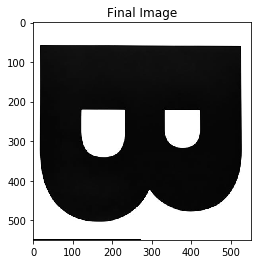

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, floor, ceil, radians

# Reading input image
imageArray_1 = cv2.imread('B.jpg')

# coverting image to gray scale
grayImage_1 = 0.2989*imageArray_1[:,:,0] + 0.5870*imageArray_1[:,:,1] + 0.1140*imageArray_1[:,:,2]

# Reading input image - This the transformed image
imageArray_2 = cv2.imread('Br.jpg')

# coverting the transformed image to gray scale
grayImage_2 = 0.2989*imageArray_2[:,:,0] + 0.5870*imageArray_2[:,:,1] + 0.1140*imageArray_2[:,:,2]


points = []
# Function to take take coordinates on mouse clicks
# It will bring the pop up of the image which will hide after we press escape
def mouseCB(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK :
        print (x, y)
        points.append([x, y])

cv2.namedWindow('imageArray_1')
cv2.setMouseCallback('imageArray_1', mouseCB)    

while True:
    cv2.imshow('imageArray_1', imageArray_1)
    ip = cv2.waitKey(20) & 0xFF
    if ip == 27:
        break    
        
cv2.destroyAllWindows()

point_source = np.copy(points)

points = []


cv2.namedWindow('imageArray_2')
cv2.setMouseCallback('imageArray_2', mouseCB)    

while True:
    cv2.imshow('imageArray_2', imageArray_2)
    ip = cv2.waitKey(20) & 0xFF
    if ip == 27:
        break    


point_target = np.copy(points)

cv2.destroyAllWindows()


print ("source = ", point_source)
print ("taget = ", point_target)
# x1, x2, x3, y1, y2, y3 = point_source[0,0], point_source[1,0], point_source[2,0], point_source[0,1], point_source[1,1], point_source[2,1]
# x_1, y_1 , x_2, y_2, x_3, y_3 = point_target[0,0], point_target[0,1], point_target[1,0], point_target[1,1], point_target[2,0], point_target[2,1]

# getting the points for matrix X
y1, y2, y3, x1, x2, x3 = point_source[0,0], point_source[1,0], point_source[2,0], point_source[0,1], point_source[1,1], point_source[2,1]

# getting the points for matrix x dash
x_1, y_1 , x_2, y_2, x_3, y_3 = point_target[0,1], point_target[0,0], point_target[1,1], point_target[1,0], point_target[2,1], point_target[2,0]

# Generating Matrix X
X = np.matrix([[x1, y1, 1, 0, 0, 0], [0, 0, 0, x1, y1, 1,], [x2, y2, 1, 0, 0, 0], [0, 0, 0, x2, y2, 1,], [x3, y3, 1, 0, 0, 0], [0, 0, 0, x3, y3, 1,]])

# Generating Matrix Y
x_ = np.matrix([[x_1],[y_1],[x_2],[y_2],[x_3],[y_3]])

print ("X = ", X)
print ("x_ = ", x_)

X_inverse = np.linalg.inv(X)

# Calculating matrix a
a = np.matmul(X_inverse, x_)

print ("a", a)


# Function for Bilinear interpolation
def Biliniear(grayImage_1, transformation_matrix,target_img):
    columns = grayImage_1.shape[1]   
    rows = grayImage_1.shape[0]
    transform = np.linalg.inv(transformation_matrix)
    for i in range(rows):
        for j in range(columns):
            target_vector = np.array([i, j, 1]).reshape(3, 1)
            source_vector = np.matmul(transform, target_vector)
            if source_vector[0][0] > 0 and source_vector[0][0] < rows-1 and source_vector[1][0] > 0 and source_vector[1][0] < columns-1:
                x_floor = int(np.floor(source_vector[0][0]))
                x_ceil = int(np.ceil(source_vector[0][0]))
                y_floor = int(np.floor(source_vector[1][0]))
                y_ceil = int(np.ceil(source_vector[1][0]))
                
                x = source_vector[0][0]
                y = source_vector[1][0]
                Q = np.array([grayImage_1[x_floor, y_floor], grayImage_1[x_floor, y_ceil], grayImage_1[x_ceil, y_floor], grayImage_1[x_ceil, y_ceil]]).reshape(2, 2)
                
                if x_floor == x_ceil and y_floor == y_ceil:
                    target_img[i, j] = grayImage_1[x_floor][y_floor]
                
                elif x_floor == x_ceil:
                    target_img[i, j] = (((y-y_floor)/(y_ceil-y_floor))*Q[0,1]) + (((y_ceil-y)/(y_ceil-y_floor))*Q[0,0])
                    
                elif y_floor == y_ceil:
                    target_img[i, j] = (((x-x_floor)/(x_ceil-x_floor))*Q[1,0]) + (((x_ceil-x)/(x_ceil-x_floor))*Q[0,0])
                    
                else:
                    r1 = (((x-x_floor)/(x_ceil-x_floor))*Q[1,0]) + (((x_ceil-x)/(x_ceil-x_floor))*Q[0,0])
                    r2 = (((x-x_floor)/(x_ceil-x_floor))*Q[1,1]) + (((x_ceil-x)/(x_ceil-x_floor))*Q[0,1])
                    target_img[i, j] = (((y-y_floor)/(y_ceil-y_floor))*r2) + (((y_ceil-y)/(y_ceil-y_floor))*r1)       
    return target_img

# Function to get the final image
def final_image(grayImage_1, a):
    target_img = np.zeros(grayImage_1.shape)
    transformation_matrix = np.matrix([[a[0,0], a[1,0], a[2,0]], [a[3,0], a[4,0], a[5,0]], [0, 0, 1]])
#     print(transformation_matrix)
    target_img = Biliniear(grayImage_1, transformation_matrix, target_img)
    return target_img

final_image_1 = final_image(grayImage_1, a)

# plotting image
imgplot = plt.imshow(final_image_1, cmap = 'gray')
plt.title("Final Image")
plt.show()
                    

## 2

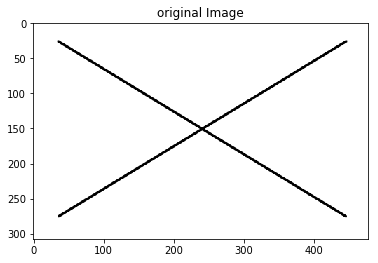

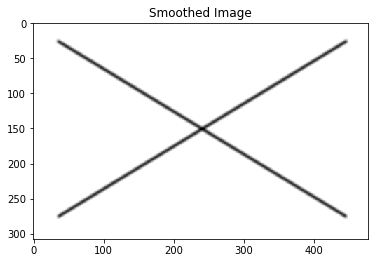

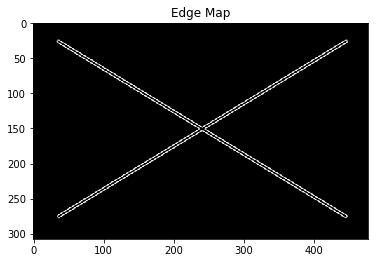

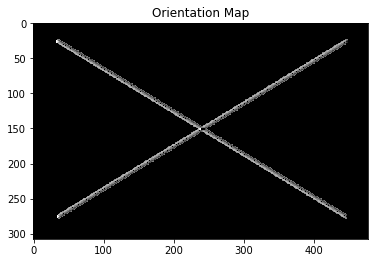

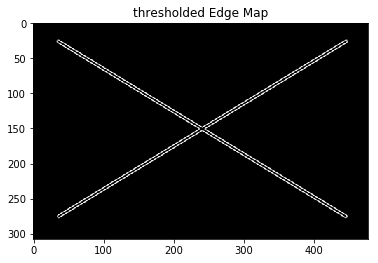

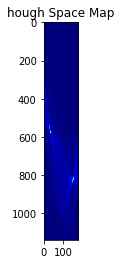

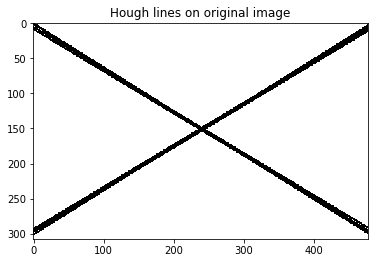

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, floor, ceil, radians

# Reading input image
imageArray_1 = cv2.imread('X_lines.png')

# imageArray_1 = cv2.imread('V.png')

# coverting image to gray scale
grayImage_1 = 0.2989*imageArray_1[:,:,0] + 0.5870*imageArray_1[:,:,1] + 0.1140*imageArray_1[:,:,2]

# plotting image
imgplot = plt.imshow(grayImage_1, cmap = 'gray')
plt.title("original Image")
plt.show()

# Smoothing Image

def smoothing(k, grayImage_1):
    sizeX = len(grayImage_1)    
    sizeY = len(grayImage_1[0]) 
    kernel = np.ones((k,k),np.float32)/(k*k)
    out_img = np.copy(grayImage_1)
    dim = k//2
    for i in range (dim, sizeX - dim):
        for j in range (dim, sizeY - dim):
#             print([grayImage_1[i-dim:i+dim+1,j-dim:j+dim+1]])
            out_img[i][j] = (sum(map(sum, kernel * grayImage_1[i-dim:i+dim+1,j-dim:j+dim+1])))
    return(out_img)

Smoothed_image = smoothing(5, grayImage_1)

imgplot = plt.imshow(Smoothed_image, cmap = 'gray')
plt.title("Smoothed Image")
plt.show()

# edge detection func
def edgeDetection(grayImage_1):
    
    sizeX = len(grayImage_1)    
    sizeY = len(grayImage_1[0])
    
    med_img = smoothing(5,grayImage_1)

#   Filter kernel  
    Mx = np.array([-0.5, 0, 0.5]).reshape(1,3)
    My = np.array([-0.5, 0, 0.5]).reshape(1,3)
    
    # Apply kernels to the image
    Ix = np.zeros(med_img.shape)
    Iy = np.zeros(med_img.shape)
    
# Applying Dx kernel
    for i in range (1, sizeX - 1):
        for j in range (1, sizeY - 1):
#             print([grayImage_1[i-dim:i+dim+1,j-dim:j+dim+1]])
            Ix[i][j] = (sum(map(sum, Mx * grayImage_1[i,j-1:j+1+1])))

# Applying Dy kernel    
    for i in range (1, sizeX - 1):
        for j in range (1, sizeY - 1):
#             print([grayImage_1[i-dim:i+dim+1,j-dim:j+dim+1]])
            Iy[i][j] = (sum(map(sum, My * grayImage_1[i-1:i+1+1,j])))

# for edge map
    edge_map = np.hypot(Ix, Iy)
    
# for orientation map
    Orientation_map = np.arctan2(Iy, Ix)
    Orientation_map= np.absolute(Orientation_map)
    return(edge_map, Orientation_map)

# Calling edge detection function
edge_map, Orientation_map = edgeDetection(grayImage_1)

imgplot = plt.imshow(edge_map, cmap = 'gray')
plt.title("Edge Map")
plt.show()

imgplot = plt.imshow(Orientation_map, cmap = 'gray')
plt.title("Orientation Map")
plt.show()

# Thresholoding func
def thresholding(image, n):
    
    sizeX_image = len(grayImage_1)
    sizeY_image = len(grayImage_1[0])
    
    thresh_val = n
    out_image = np.zeros(grayImage_1.shape)
    for i in range(0, sizeX_image):
        for j in range(0, sizeY_image):
            if (image[i][j]<thresh_val):
                out_image[i][j] = 0
            else:
                out_image[i][j] = image[i][j]
    return(out_image)

thresholded_edge_map = thresholding(edge_map,0.5)

imgplot = plt.imshow(thresholded_edge_map, cmap = 'gray')
plt.title("thresholded Edge Map")
plt.show()

# Function to generate the hough space
def hough_space_func(inp_Image):
    
    columns = inp_Image.shape[1]   
    rows = inp_Image.shape[0]
    
    diag = np.ceil(np.sqrt(rows** 2 + columns** 2))
    rho_array = np.arange(-diag, diag + 1, 1)
    theta_array = np.deg2rad(np.arange(-90, 90, 1))
    len_theta = len(theta_array)
    
    hough_space = np.zeros((len(rho_array), len(theta_array)), dtype=np.uint64)
    
    n_z_row, n_z_column = np.nonzero(inp_Image) 

    non_zero_values = len(n_z_column)
    
    for i in range(non_zero_values):
        for j in range(len_theta):  
            rho_val = int((n_z_column[i] * np.cos(theta_array[j]) + n_z_row[i] * np.sin(theta_array[j])) + diag)
            hough_space[rho_val, j] += 1
    return hough_space, rho_array, theta_array

hough_space, rho_array, theta_array = hough_space_func(thresholded_edge_map)

imgplot = plt.imshow(hough_space, cmap = 'jet')
plt.title("hough Space Map")
plt.show()

def hough_peaks_func(Hough_space, num_peaks):
    indices = np.argpartition(Hough_space.flatten(), -2)[-num_peaks:]
    Final = np.vstack(np.unravel_index(indices, Hough_space.shape)).T
    return Final

indices = hough_peaks_func(hough_space, 8)

def hough_lines_drawing_func(inp_img, indices, rho_array, theta_array):
    for i in range(len(indices)):
        a = np.cos(theta_array[indices[i][1]])
        b = np.sin(theta_array[indices[i][1]])
        
        x0 = a * rho_array[indices[i][0]]
        y0 = b * rho_array[indices[i][0]]
        
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        
        cv2.line(inp_img, (x1, y1), (x2, y2), (0, 0, 255), 2)

hough_lines_drawing_func(grayImage_1, indices, rho_array, theta_array)

imgplot = plt.imshow(grayImage_1, cmap = "gray")
plt.title("Hough lines on original image")
plt.show()